In [1]:
#Importacion de librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#https://www.nltk.org

#Configuracion general de matplotlib
%matplotlib inline
plt.style.use('default')

#Tamaños de textos
figure_sub_title_fs = 15
figure_labels_fs = 12
figure_axis_fs = 10
figure_legend_fs = 10

#Tamaño de la visualización, hoja A4
fig = plt.figure()
fig.set_size_inches(20,30)

#Formato de numeros reales
pd.options.display.float_format = '{:20,.2f}'.format

#Configuracion de warnings
warnings.filterwarnings('ignore')

<Figure size 2000x3000 with 0 Axes>

In [2]:
#Importacion del archivo CSV de fuente
#https://www.kaggle.com/c/nlp-getting-started
tweets = pd.read_csv('../data/train.csv')

#Vemos la estructura del dataframe, trayendo los primeros 5 registros
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
#Vemos la cantidad de registros
print("Shape: " + str(tweets.shape))

Shape: (7613, 5)


In [4]:
#Constatamos que en text y target no existen nulos
tweets.count()

id          7613
keyword     7552
location    5080
text        7613
target      7613
dtype: int64

In [5]:
#Relleno de nulos
tweets['keyword'] = tweets['keyword'].fillna('None')
tweets['location'] = tweets['location'].fillna('Unknown')

In [6]:
#Calculamos la longitud de los tweets en el set de datos, y la guardamos en una nueva columna
tweets['length'] = tweets['text'].str.len()

In [7]:
#Nos quedamos con los tweets que tienen target 0 y target 1 en 2 series, respectivamente
tweets_lengths_0 = tweets[tweets['target'] == 0]
tweets_lengths_0_s = tweets_lengths_0['length']
tweets_lengths_1 = tweets[tweets['target'] == 1]
tweets_lengths_1_s = tweets_lengths_1['length']

## PREGUNTAS

0 - Matriz de correlación entre todas las variables?
- Ver qué pregunta podría contestar esto

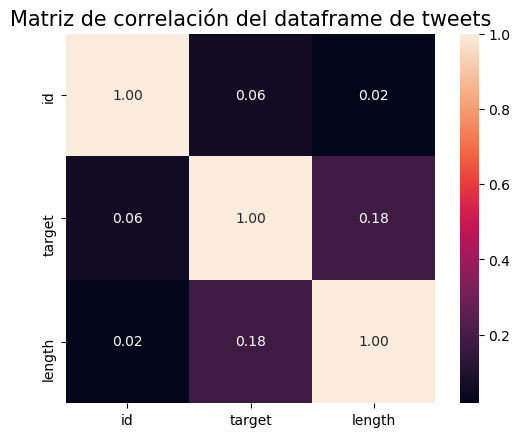

In [8]:
# Matriz de correlaciones como heatmap
plt.figure()
ax1 = sns.heatmap(tweets.corr(method='pearson', min_periods=1), square=True, annot=True, fmt='.2f')
ax1.set_title("Matriz de correlación del dataframe de tweets", fontsize=figure_sub_title_fs);

plt.show()

1 - Cuál es la distribución de tweets según su target?

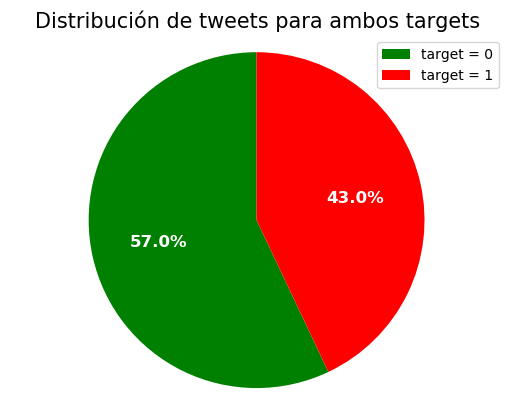

In [9]:
#Graficamos la distribucion de la longitud de los tweets, discriminada por target
fig = plt.figure()
ax1 = fig.add_subplot()
labels = "target = 0", "target = 1"
colors = ["green", "red"]
sizes = [tweets_lengths_0_s.count(), tweets_lengths_1_s.count()]
ax1.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=False, startangle=90, textprops=dict(color="w",fontweight='bold', fontsize=figure_labels_fs))
ax1.axis('equal')
ax1.legend(labels,fontsize=figure_legend_fs)
ax1.set_title("Distribución de tweets para ambos targets", fontsize=figure_sub_title_fs)

plt.show()

2 - Cuál es la distribución de tweets según su idioma?

In [10]:
#Andy

3 - Cuál es la distribución geográfica de los tweets?
- Qué proporción de tweets incluye location?
- Según el target?
- Cual es la distribución de targets por location?

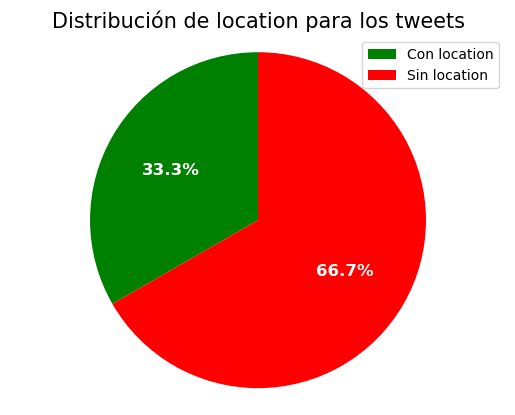

In [11]:
#JM
#Distribucion de tweets con location y sin location
fig = plt.figure()
ax1 = fig.add_subplot()
labels = "Con location", "Sin location"
colors = ["green", "red"]
sizes = [(tweets['location'] == 'Unknown').value_counts().iloc[1], (tweets['location'] == 'Unknown').value_counts().iloc[0]]
ax1.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=False, startangle=90, textprops=dict(color="w",fontweight='bold', fontsize=figure_labels_fs))
ax1.axis('equal')
ax1.legend(labels,fontsize=figure_legend_fs)
ax1.set_title("Distribución de location para los tweets", fontsize=figure_sub_title_fs)

plt.show()

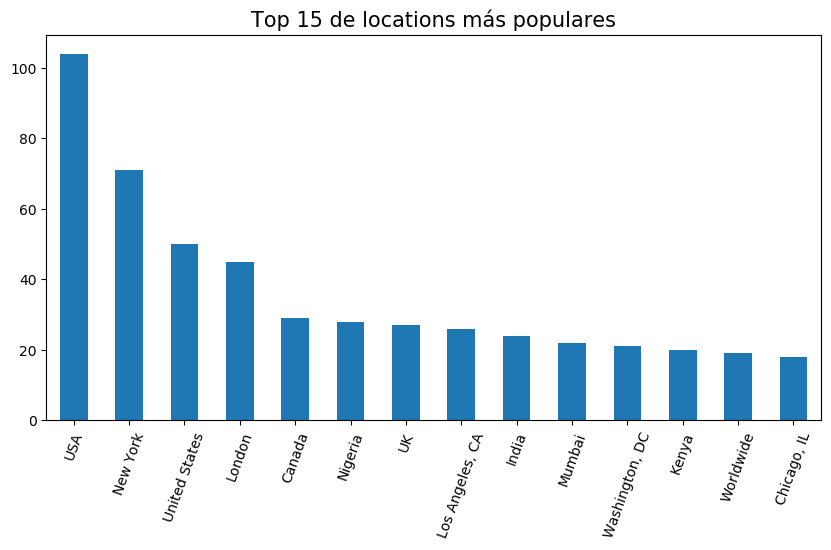

In [19]:
#25 locations mas populares - sacamos el unknown, que es el mas popular
tweets_top_locations = tweets['location'].value_counts().head(15)
tweets_top_locations = tweets_top_locations.drop(tweets_top_locations.index[0])

fig = plt.figure()
ax1 = fig.add_subplot()

ax1 = tweets_top_locations.plot(kind='bar', figsize=(10, 5), rot=70);
ax1.set_title("Top 15 de locations más populares", fontsize=figure_sub_title_fs)
plt.show()

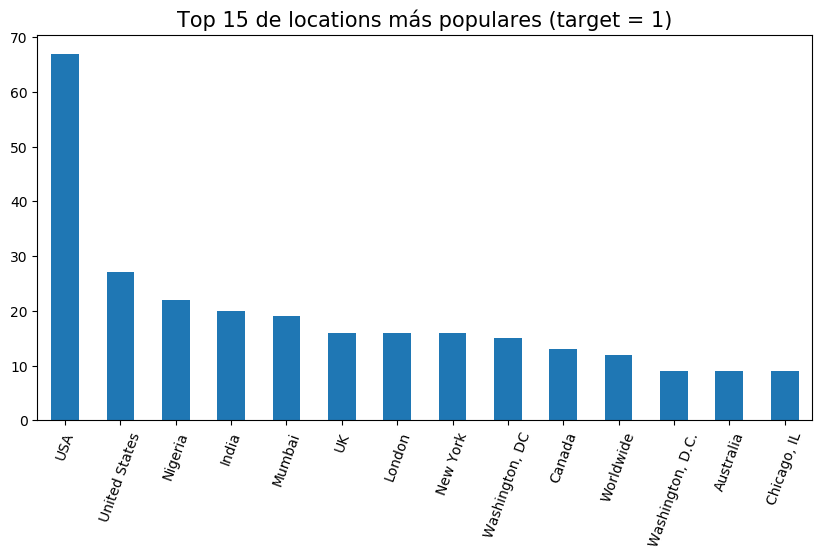

In [17]:
#Mismo que anterior pero discriminado por target 1
#25 locations mas populares - sacamos el unknown, que es el mas popular
tweets_top_locations_1_df = tweets[tweets['target'] == 1]
tweets_top_locations_1 = tweets_top_locations_1_df['location'].value_counts().head(15)
tweets_top_locations_1 = tweets_top_locations_1.drop(tweets_top_locations_1.index[0])

fig = plt.figure()
ax1 = fig.add_subplot()

ax1 = tweets_top_locations_1.plot(kind='bar', figsize=(10, 5), rot=70);
ax1.set_title("Top 15 de locations más populares (target = 1)", fontsize=figure_sub_title_fs)
plt.show()

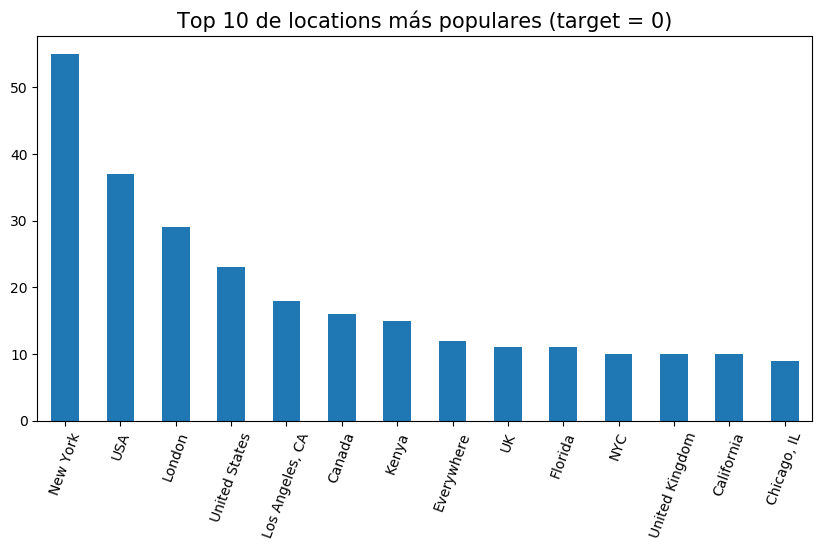

In [21]:
#Mismo que anterior pero discriminado por target 0
#25 locations mas populares - sacamos el unknown, que es el mas popular
tweets_top_locations_0_df = tweets[tweets['target'] == 0]
tweets_top_locations_0 = tweets_top_locations_0_df['location'].value_counts().head(15)
tweets_top_locations_0 = tweets_top_locations_0.drop(tweets_top_locations_0.index[0])

fig = plt.figure()
ax1 = fig.add_subplot()

ax1 = tweets_top_locations_0.plot(kind='bar', figsize=(10, 5), rot=70);
ax1.set_title("Top 10 de locations más populares (target = 0)", fontsize=figure_sub_title_fs)
plt.show()

In [22]:
#Ver si se puede mejorar, agrupando paises o regiones.
#Filtrar valores erroneos, tipo M!$$!$$!P!, que hacen explotar a pandas

4 - Existe relación entre el valor del target y la longitud de los tweets?

In [23]:
#Imprimimos el total de tweets y valores maximos, minimos, medios de longitud para cada serie
print("Total de tweets          : " + str(tweets['target'].count()) + "\n")
print("Cantidad,        target 0: " + str(tweets_lengths_0_s.count()))
print("Longitud minima, target 0: " + str(tweets_lengths_0_s.min()))
print("Longitud media,  target 0: " + str(tweets_lengths_0_s.mean()))
print("Longitud maxima, target 0: " + str(tweets_lengths_0_s.max()) + "\n")
print("Cantidad,        target 1: " + str(tweets_lengths_1_s.count()))
print("Longitud minima, target 1: " + str(tweets_lengths_1_s.min()))
print("Longitud media,  target 1: " + str(tweets_lengths_1_s.mean()))
print("Longitud maxima, target 1: " + str(tweets_lengths_1_s.max()))

Total de tweets          : 7613

Cantidad,        target 0: 4342
Longitud minima, target 0: 7
Longitud media,  target 0: 95.70681713496084
Longitud maxima, target 0: 157

Cantidad,        target 1: 3271
Longitud minima, target 1: 14
Longitud media,  target 1: 108.11342097217977
Longitud maxima, target 1: 151


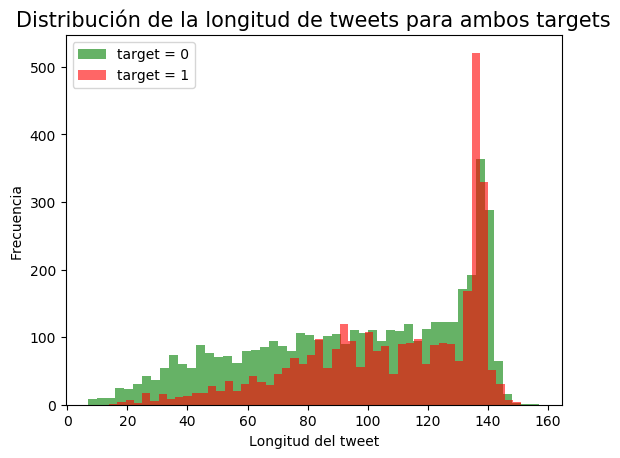

In [24]:
#Graficamos la distribucion de la longitud de los tweets, discriminada por target
#Histogramas superpuestos
fig = plt.figure()
ax2 = fig.add_subplot()
ax2 = tweets_lengths_0_s.plot.hist(bins=50, color='green',alpha=0.6)
ax2 = tweets_lengths_1_s.plot.hist(bins=50, color='red',alpha=0.6)
ax2.set_title("Distribución de la longitud de tweets para ambos targets", fontsize=figure_sub_title_fs)
ax2.legend(["target = 0","target = 1"],fontsize=figure_legend_fs)
ax2.set_xlabel("Longitud del tweet",fontsize=figure_axis_fs)
ax2.set_ylabel("Frecuencia", fontsize=figure_axis_fs)

plt.show()

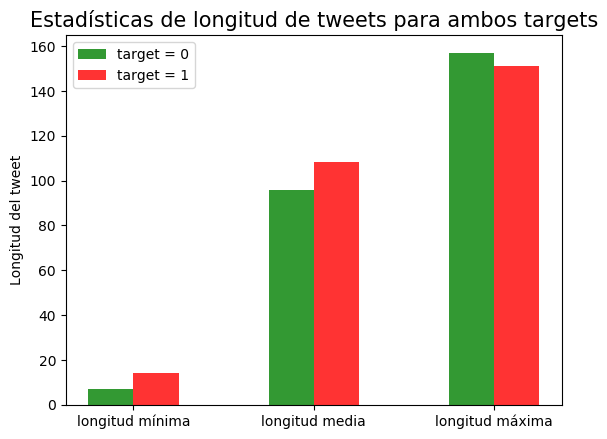

In [25]:
#Graficamos las estadisticas basicas de la longitud de los tweets
fig = plt.figure()
ax4 = fig.add_subplot()
barWidth = 0.25
bars1 = [tweets_lengths_0_s.min(), tweets_lengths_0_s.mean(), tweets_lengths_0_s.max()]
bars2 = [tweets_lengths_1_s.min(), tweets_lengths_1_s.mean(), tweets_lengths_1_s.max()]
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.xticks([r + barWidth/2 for r in range(len(bars1))], ['longitud mínima', 'longitud media', 'longitud máxima'], fontsize=figure_axis_fs)
ax4.bar(r1, bars1, color='green', width=barWidth, label='target = 0', alpha=0.8)
ax4.bar(r2, bars2, color='red', width=barWidth, label='target = 1', alpha=0.8)
ax4.set_title("Estadísticas de longitud de tweets para ambos targets", fontsize=figure_sub_title_fs)
ax4.legend(["target = 0","target = 1"],fontsize=figure_legend_fs)
ax4.set_ylabel("Longitud del tweet", fontsize=figure_axis_fs)

plt.show()

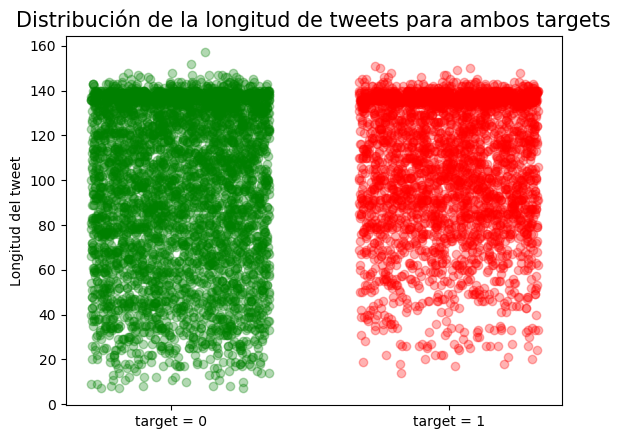

In [26]:
#Graficamos la distribucion de la longitud de los tweets, discriminada por target
#Scatterplot con jitter
fig = plt.figure()
ax3 = fig.add_subplot()
plt.xticks([0.18,0.80],['target = 0','target = 1'], fontsize=figure_axis_fs)
ax3.scatter(tweets_lengths_0['target'].apply(lambda n: n+(((np.random.random_sample()/2.5)))), tweets_lengths_0['length'], color='green', alpha=0.3)
ax3.scatter(tweets_lengths_1['target'].apply(lambda n: n-(((np.random.random_sample()/2.5)))), tweets_lengths_1['length'], color='red', alpha=0.3)
ax3.set_title("Distribución de la longitud de tweets para ambos targets", fontsize=figure_sub_title_fs)
ax3.set_ylabel("Longitud del tweet", fontsize=figure_axis_fs)

plt.show()

5 - Existe relación entre el valor del target y la cantidad de palabras de los tweets?
- Radar chart sobre las principales keywords y las cantidades de palabras
promedio.en los tweets (uno Para los 10 keyword principales y otro para las 10
menos importantes para comparar)



In [27]:
#Andy

6 - Cuáles son los hashtags más populares?
- Qué proporción de tweets incluye hashtags
- Según el target? Los hashtags de target = 1 indican desastre natural?

In [28]:
#Andy

7 - Cuáles son los los keywords más populares?
- Qué proporción de tweets incluye keywords
- Según el target? Los keywords de target = 1 indican desastre natural?

In [29]:
#Pato

8 - Cuáles son las palabras más populares?
- Según el target? Las palabras de target = 1 indican desastre natural?

In [30]:
#JM - cantidad de keywords por target
#https://relatedwords.org/relatedto/natural%20disaster
#https://describingwords.io/for/natural%20disaster
#https://www.teachstarter.com/vocabulary-list/natural-disaster-vocabulary/c

9 - Relacionar hashtags con keywords
- Según el target?

In [31]:
#Pato